In [1]:
import pandas as pd
import numpy as np
from AllFunctions import *
from numpy import log2, log, sqrt
import matplotlib.pyplot as plt
import random
from random import sample
import copy

In [2]:
# txtfile = open('bank/data-desc.txt', 'r')
# print(txtfile.read())

In [3]:
C = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 
 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
types = ['numeric', 'categorical', 'categorical', 'categorical', 'binary', 'numeric', 
                      'binary', 'binary', 'categorical', 'numeric', 'categorical', 'numeric', 
                      'numeric', 'numeric', 'numeric', 'categorical', 'binary']
dic= dict(zip(C, types))

In [4]:
train = pd.read_csv('bank/train.csv', names = C)
test = pd.read_csv('bank/test.csv', names = C)
#train.head()

In [5]:
median_dict = {}
Train_new =pd.DataFrame()
Test_new =pd.DataFrame()
for name in C:
    if dic[name] == 'numeric':
        M = train[name].median()
        median_dict[name] = M
        Train_new[name+ '>' + str(M)] = np.where(train[name]  > M, 'yes', 'no')
        Test_new[name+ '>' + str(M)] = np.where(test[name]  > M, 'yes', 'no')
    else:
        Train_new[name] = train[name]
        Test_new[name] = test[name]

In [6]:
Train = []
Label = []
for i in range(len(Train_new)):
    temp = list(Train_new.loc[i])
    Train.append(temp[:-1])
    Label.append(temp[-1])

In [7]:
Test = []
Test_Label = []
for i in range(len(Test_new)):
    temp = list(Test_new.loc[i])
    Test.append(temp[:-1])
    Test_Label.append(temp[-1])

In [8]:
for i in range(len(Label)):
    if Label[i] == 'yes':
        Label[i] = 1
    else:
        Label[i] = -1

In [9]:
for i in range(len(Test_Label)):
    if Test_Label[i] == 'yes':
        Test_Label[i] = 1
    else:
        Test_Label[i] = -1

In [10]:
atts = list(range(0,len(C)-1))

In [11]:
# print(atts)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [12]:
def sample_(X, Y, n_samples = None):
    n = len(X)
    if n_samples == None:
        n_samples = n
        
    s_t = []
    s_l = []
    for _ in range(0, n_samples):
        i = random.randint(0, n-1)
        s_t.append(X[i])
        s_l.append(Y[i])

    return s_t, s_l

In [13]:
R = [2,4,6]
List = []
for i in range(3):
    r = R[i]
    F = []
    print('r = ', r)
    for x in range(500):
        
        X, Y = sample_(Train, Label)
#         X, Y = sample_(Train, Label, 2000)
#         X, Y = Train, Label
        model = DT(X, Y, attss = [i for i in range(len(Train[0]))], depth = -1, 
                          randomness = r)
        F.append(copy.copy(model))
    List.append(F)

r =  2
r =  4
r =  6


In [14]:
id(List[0][0]),List[0][0]

(140455552008928, <AllFunctions.DT at 0x7fbe5b48c2e0>)

In [15]:
id(List[1][0]),List[1][0]

(140453764579392, <AllFunctions.DT at 0x7fbdf0bec040>)

In [16]:
def Error_bagging(FF, X, Y):
    
    n = len(Y)
    errorrr = [0] * len(FF)
    
    for i in range(n):
        count = {}
        majority = None
        Max = -1
        for j in range(len(FF)):
            

            temp = FF[j].predict(X[i]) 
            if temp not in count:
                count[temp] = 0
                
            count[temp] += 1
            if count[temp] > Max:
                Max = count[temp]
                majority = temp
        
            if majority != Y[i]:
                errorrr[j] += 1/len(Y)
                
    return(errorrr)

In [17]:
E_train_0 = Error_bagging(List[0], Train, Label)
E_train_1 = Error_bagging(List[1], Train, Label)
E_train_2 = Error_bagging(List[2], Train, Label)

In [18]:
E_test_0 = Error_bagging(List[0], Test, Test_Label)
E_test_1 = Error_bagging(List[1], Test, Test_Label)
E_test_2 = Error_bagging(List[2], Test, Test_Label)

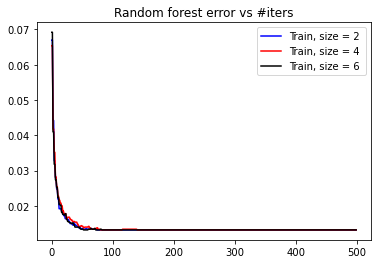

In [19]:
plt.plot(E_train_0, color ='blue', label = "Train, size = 2")
plt.plot(E_train_1, color ='red', label = "Train, size = 4")
plt.plot(E_train_2, color ='black', label = "Train, size = 6 ")
#plt.plot(E_test, color ='red', label = "Test")

plt.axis()
plt.title("Random forest error vs #iters", color='black') 
plt.legend()
plt.show()


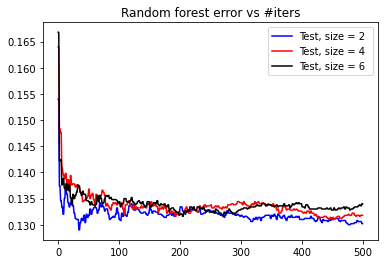

In [20]:
plt.plot(E_test_0, color ='blue', label = "Test, size = 2")
plt.plot(E_test_1, color ='red', label = "Test, size = 4")
plt.plot(E_test_2, color ='black', label = "Test, size = 6 ")
#plt.plot(E_test, color ='red', label = "Test")

plt.axis()
plt.title("Random forest error vs #iters", color='black') 
plt.legend()
plt.show()

